Analysis of the results computed in 'Alpha-rho(0) exploration' notebook.

Results discussed in the Supplementary Material of the paper.

In [1]:
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

%load_ext autoreload

In [2]:
%autoreload
import sys
sys.path.insert(0, "../")

import pickle
import math as m
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from experiment_utils import plot_history, compare_histories
from layer_rotation_utils import plot_layer_rotation_curves

Using TensorFlow backend.


In [4]:
with open('results.p','rb') as f: 
    results = pickle.load(f)

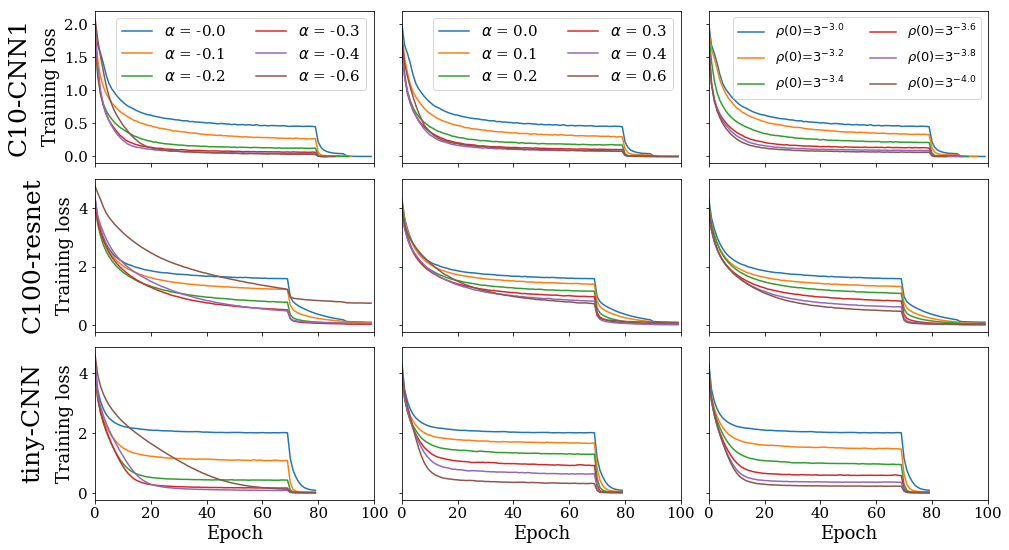

In [33]:
tasks = ['C10-CNN1','C100-resnet', 'tiny-CNN']

matplotlib.rcParams.update({'font.size': 15})
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

f, axes = plt.subplots(len(tasks), 3, figsize = (16,3*len(tasks)), sharey = 'row', sharex = 'col')
axes = np.array([axes]) if len(tasks) == 1 else axes

optimizer = 'SGD_layca'
alphas = np.array([0.,0.1,0.2,0.3,0.4,0.6])
lrs = [3.**(-i) for i in [3,3.2,3.4,3.6,3.8,4]] # range(-2,8)
for i,task in enumerate(tasks):
    for j,sign in enumerate([-1,1]):
#         plt.figure()
#         plt.rc('text', usetex=False)
#         plt.rc('font', family='serif')

#         sign = -1 if task == 'C10-CNN1' else 1
        for alpha in sign*alphas:
            history = results[task][optimizer][alpha][3**-3]['history']
            axes[i,j].plot(history['epoch'],history['history']['loss'], label = r'$\alpha$ = '+str(alpha))
    #     if i == 0:
    
        if i == 0:
            axes[i,j].legend(ncol=2)
        
        if j == 0:
            axes[i,j].set_ylabel('Training loss',size = 18)
        if i == 2:
            axes[i,j].set_xlabel('Epoch',size = 18)
            axes[i,j].set_xlim([0,100])
    
#         plt.xlim(-1,100)
#         plt.title(task,y = 1.1)
    
    for lr in lrs:
        history = results[task][optimizer][0.][lr]['history']
        axes[i,2].plot(history['epoch'],history['history']['loss'], label = r'$\rho (0)$=$3^{'+str(round(m.log(lr,3),1))+'}$')
    if i == 0:
        axes[i,2].legend(ncol=2,fontsize = 13)
    if i == 2:
        axes[i,2].set_xlabel('Epoch',size = 18)
        axes[i,2].set_xlim([0,100])
        
    pad = 8
    axes[i,0].annotate(task, xy=(0, 0.5), xytext=(-axes[i,0].yaxis.labelpad - pad, 0),
                    xycoords=axes[i,0].yaxis.label, textcoords='offset points',
                    size=25, ha='right', va='center',rotation=90)
    
plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.1)

plt.savefig('figures/training_speed.eps',format='eps', dpi=200, bbox_inches="tight")